## CAPM in Python

### What is CAPM?
In finance, CAPM is known as the **Capital Asset Pricing Model** and it is widely used for pricing risky securities and generating expected returns given the risk and a "cost of capital". CAPM operates on a number of assumptions about how markets behave and is important mainly because most market participants adopted this framework.

In modern financial theory, two major assumptions are made:
1. Securities markets are very competitive and "**efficient**"
2. These markets are dominated by **rational, risk-averse investors**, who intend to maximize their own return on investment.

The issue is that in practice, investors do not always behave in such ways and there are externalities that can compromise market efficiency. Regardless, it makes sense to base investment decisions assuming that markets are efficient and dominated by rational people because the alternative is entirely unpredictable and irrational.

CAPM is represented by this fundamental formula for calculating expected return of an asset given its risk:

\begin{align*} \\
ER_i         &= R_f + \beta_i (ER_m - R_f) \\ \\
ER_i         &= \mbox{Expected Return on Investment} \\
R_f          &= \mbox{Risk-free Rate} \\
\beta_i      &= \mbox{Beta of the investment} \\
(ER_m - R_f) &= \mbox{Market Risk Premium} \\
\end{align*}

## Unpacking Market Risk Premium

By the definition of CAPM, we can be creative when it comes to how we interpret each of these parameters. However, the best choice of parameter is the one that you know the rest of the market would agree with because it is consistent with the underlying CAPM assumptions.

### Risk-free Rate
However, we typicaly consider the risk-free rate to be the rates offered by US treasury bills, for example we could use the three-month treasury bill (about 0.1 as  of 10/19/2020). We use the risk free rate effectively as our yardstick for the return we can expect for taking zero risk on our investment. 

Now, if I wanted I could disagree with saying that 3 month T-bills no longer offer zero-risk investment opportunity, but it's quite a reasonable assumption for anyone living in the US and is not of the belief that the US will suddenly fall apart within 3 months.

### Expected Market Rate of Return
This is just the return that is demanded by all market participants for taking on risk of being invested in the market. By definition, if the market becomes more risky, then they will expect higher returns for being in the market. Typically, to determine the expected market rate of return, we look to indicies like the S%P 500, Nasdaq, or the Dow Jones and take the average of historical returns.

### Beta of the Investment
This is a measure of the underlying risk for holding an investment and it is relative to the risk the broader market. In practice, we can never really put a number on the underlying risk of the market or a security. There are so many real world factors that go into determining how risky one investment is compared to the other, but often times we just use the volatility in price as a measure of the risk associated with an investment. However, it is clear that sometimes the underlying risk is not fairly represented by the volatility in prices. Regardless, we need some objective measure that we can standardize across all types of investment, and price volatility is accessible for most investments you can make.


\begin{align*} \\
\beta_i &= \frac{Cov(r_i, r_m)}{Var(r_m)} \\ \\
\beta_i &= \mbox{market beta of asset i} \\
r_m     &= \mbox{average expected rate of return on the market} \\
r_i     &= \mbox{expected return on an asset i} \\
\end{align*}

In [25]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt


## We use yfinance, it's pretty decent

class CAPM:
    def __init__(self, stock_ticker, market_ticker, year, interval):
        data = yf.download("{} {}".format(stock_ticker, market_ticker), start="{}-01-01".format(year), interval = "{}".format(interval)).dropna()
        self.data = data["Adj Close"]
        self.year = year
        self.stock = data[("Adj Close", stock_ticker)]
        self.market = data[("Adj Close", market_ticker)]
        self.stock_returns = self.stock.pct_change()
        self.market_returns = self.market.pct_change()
        self.beta = self.market_returns.cov(self.stock_returns)/self.market_returns.var()
        self.e_mrr = (self.market[-1]/self.market[0])**(1/(2020-int(self.year)))-1
    
    def expected_rate(self):
        rf = 0.01 ##we can just plug some arbitrary rate from the US treasury most likely
        e_rr = rf + self.beta*(self.e_mrr - rf)
        return e_rr

**Note**: today, CAPM assumptions are detached from the reality of the market how people behave because of the ability for small groups of market participants to apply virtually infinite leverage on their influence through the internet. Markets are ultimately driven by the decisons of people (and adaptive models), if people can be convinced to behave in a predictable manner, there is a clear way to generate alpha. To be fair, it is a framework for pricing assets that dates back to the 1960s.

In [26]:
beta_TSLA = CAPM("TSLA","^IXIC", "2015", "1mo") ## compared to nasdaq

[*********************100%***********************]  2 of 2 completed


In [27]:
beta_TSLA.expected_rate()

0.29699462834875046

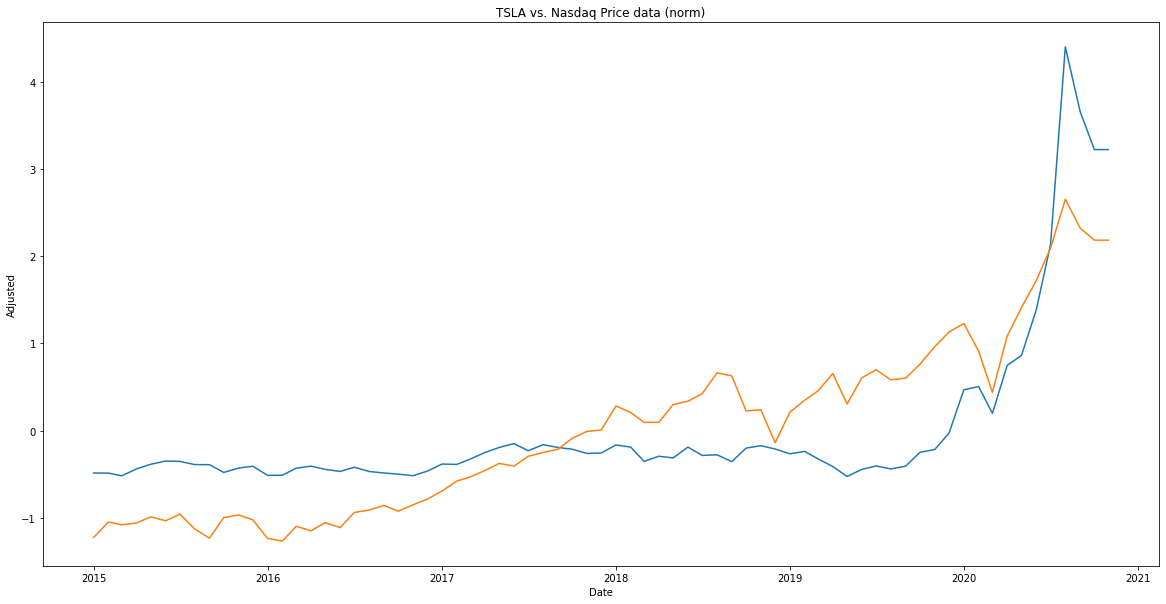

In [28]:
plt.figure(figsize=(20,10))
plt.plot((beta_TSLA.data-beta_TSLA.data.mean())/beta_TSLA.data.std())
plt.xlabel("Date")
plt.ylabel("Adjusted")
plt.title("TSLA vs. Nasdaq Price data (norm)")
plt.show()

In [29]:
beta_TSLA.beta

1.6236334742433858